# EdU RB quantification
Analyse single cell data from Edu-RB-Analysis CSV file
Format column/rows has to be adjusted in the Figure function



In [ ]:
# Path to folder where sc csv file is stored
D_PATH='/Users/hh65/Desktop/220408_XM_EdURBtest01'

In [28]:
import os
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(D_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
    plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


IndentationError: expected an indented block (2057756251.py, line 22)

In [2]:
csv_path=os.path.join(D_PATH, 'EdURB_Test01.csv')
df_gn=pd.read_csv(csv_path, index_col=0).sort_values(by=['row','column'])


,label,area,max_intensity_DAPI,mean_intensity_DAPI,max_intensity_EdU,mean_intensity_EdU,max_intensity_RB,mean_intensity_RB,column,row,integrated_int_DAPI,DNA_content
23526,1,234,13580.0,6842.115385,1161.0,297.670940,4125.0,2081.085470,7,1,1601055.0,1.894069
23527,2,75,9910.0,6250.186667,283.0,221.306667,3036.0,2024.333333,7,1,468764.0,0.554554
23528,3,85,12103.0,7813.835294,10548.0,6276.329412,4680.0,2948.505882,7,1,664176.0,0.785729
23529,4,138,13514.0,8984.347826,12228.0,8229.050725,5860.0,3963.956522,7,1,1239840.0,1.466747
23530,5,96,7226.0,4769.500000,266.0,220.239583,2413.0,1614.885417,7,1,457872.0,0.541668


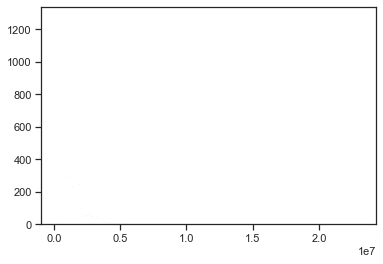

In [31]:
def dna_norm(df):
    """
    normalise histogram of DNA label
    :param df: input dataframe
    :return: input dataframe with additional column: "DNA_content"
    """
    y, x, _ = plt.hist(df['integrated_int_DAPI'], bins=1000)
    max=x[np.where(y == y.max())]
    df['DNA_content']=df['integrated_int_DAPI']/max[0]
    return df
df_gn=dna_norm(df_gn)
df_gn.head()

In [29]:
Col_List=[7,8,9,10,11]
def EdUFigures(df,list,title):
    sns.set(style='ticks', font='Arial')
    cm = plt.cm.get_cmap('RdYlBu_r')
    fig, ax = plt.subplots(len(list),2, figsize=(20, 5*len(list)))
    for number,col in enumerate(Col_List):
        df1=df[(df['column']==col)]
        df1r=df1.sample(n = int(len(df1)/3),random_state=42)
        sns.histplot(data=df1,x='DNA_content', ax=ax[number,0])
        ax[number,0].set_xlim([0,4])
        ax[number,0].title.set_text('Column'+str(col)+' DNA Histogram')
        df1r.plot.scatter( x='DNA_content', y='mean_intensity_EdU',c='mean_intensity_RB', vmin=2000, vmax=6000, cmap=cm, ax=ax[number,1])
        ax[number,1].set_xlim([0,4])
        ax[number,1].set_yscale('log')
        ax[number,1].title.set_text('Column'+str(col)+' EdU Scatterplot')

    plt.title(title)
    save_fig(title)

Saving figure EduRB_test01


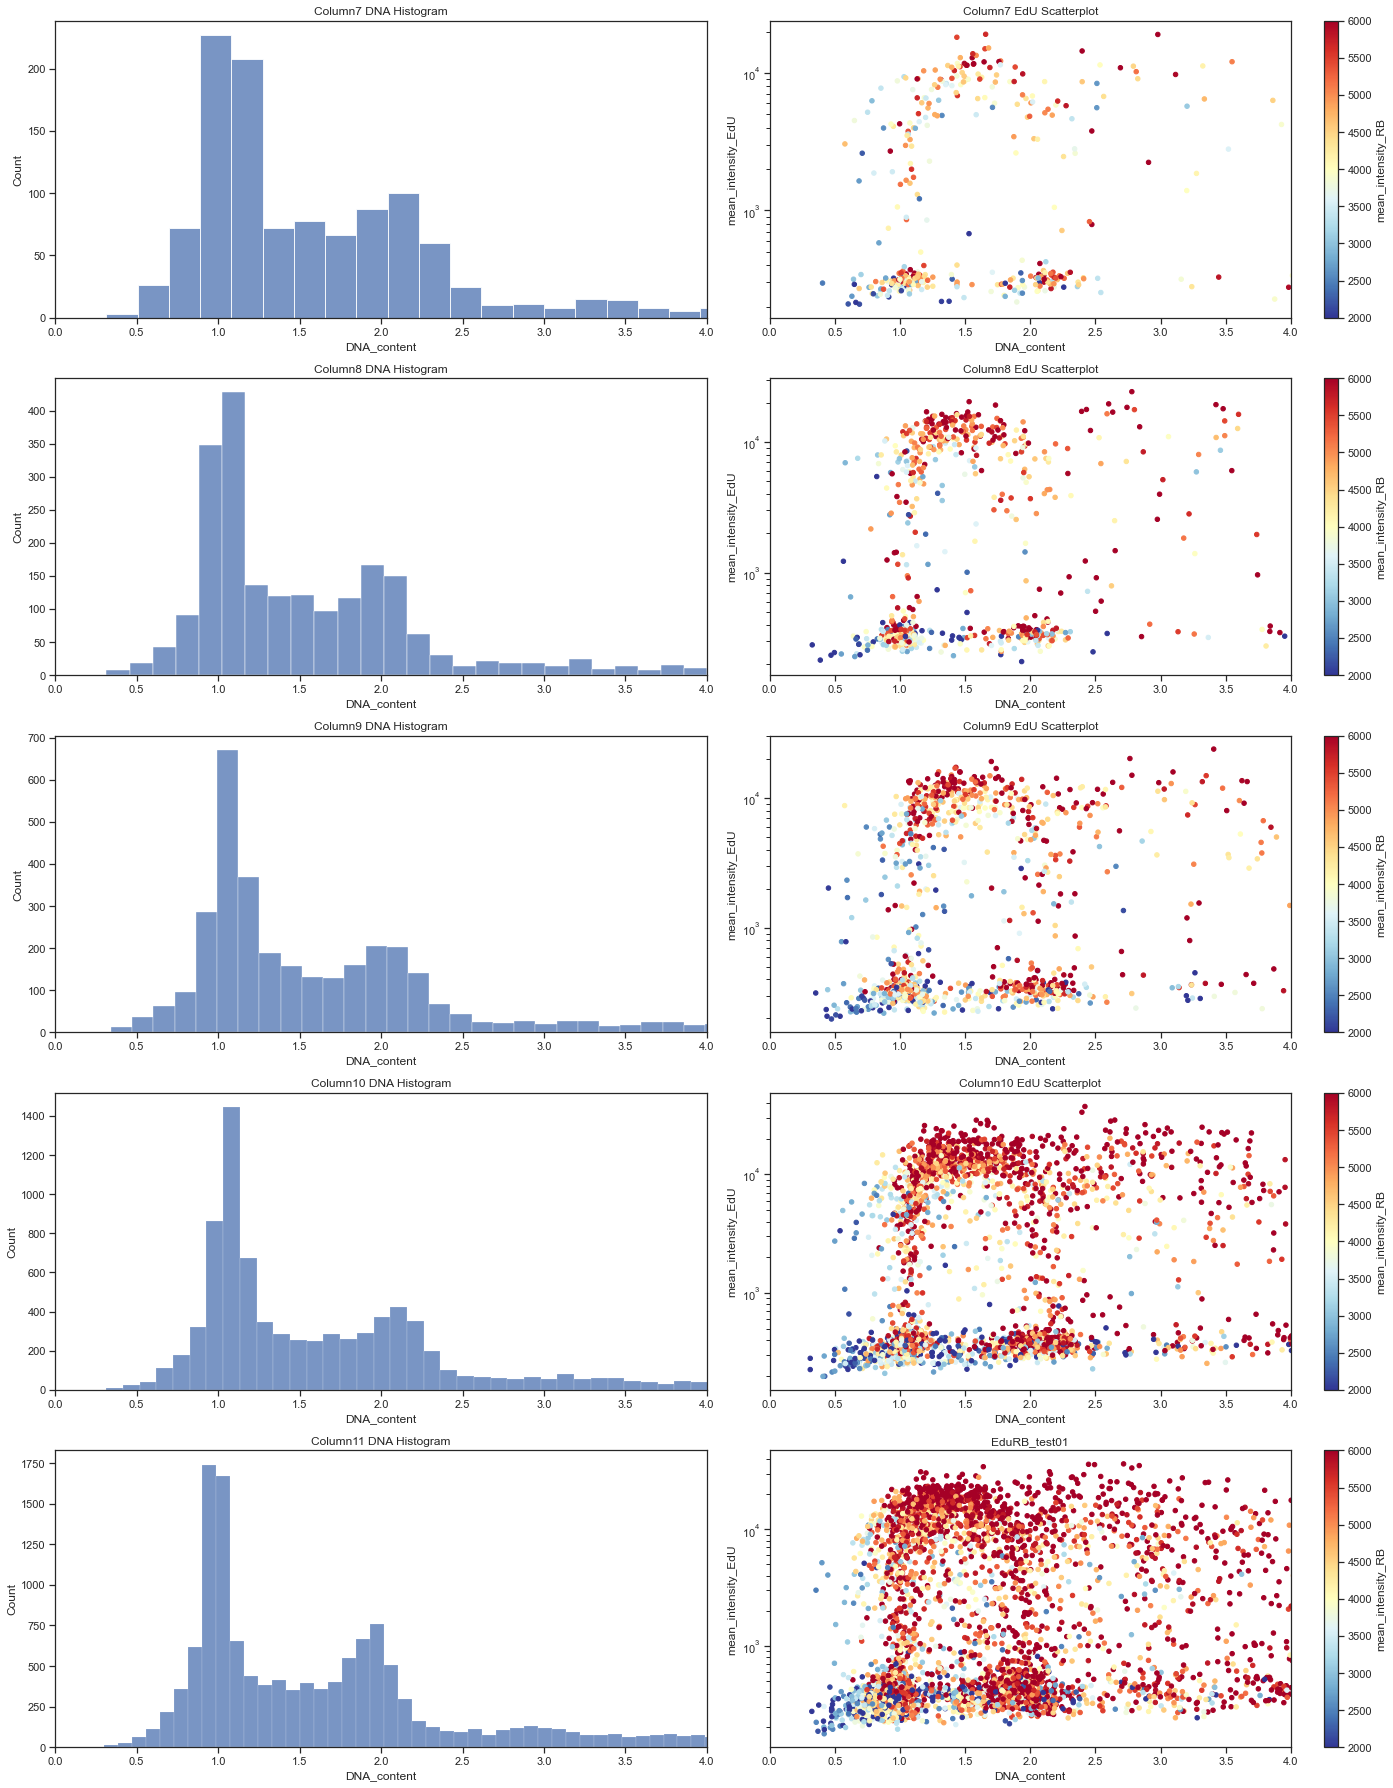

In [30]:
EdUFigures(df_gn,Col_List,'EduRB_test01')